*Francisco Pereira [camara@dtu.dk], DTU Management*

# Advanced Business Analytics

## Lecture 9 - Causality - Part 1: Ice Cream Sales

Welcome to this weeks notebook. This time we will approach a well-known example of correlation VS causation, the ice cream sales (https://www.kdnuggets.com/2019/01/dr-data-ice-cream-linked-shark-attacks.html). To make it less scary and in fact more predictive, instead of shark attacks we will talk about Scuba diving trip reservations. 

You work for a Data Sciences consulting company, and got a new contract to help an Ice Cream sales chain in a Mediterranean island, that is known for their amazing gelatto and pristine scuba diving sites. Tourism is by far the main industry in the island, however it is a very seasonal business which recently suffered from the COVID 19 crisis. 

This summer the island will certainly recover the pace, but to further mitigate the economic crisis in the island, the authorities made a very attractive campaign for the low season period (from October to April, temperatures below 20 degrees). This campaign was already so successful that the hotels already got twice as many tourist reservations to the Island as they usually do in those months, and the Scuba diving tours are almost already fully booked!

Your goal is to predict the Ice Cream sales for that compaign period, so that the sales chain can prepare itself (order more stock, hire more people). 

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [26]:
import warnings
warnings.filterwarnings('ignore')

You are given a dataset that contains sales data for 2 years, where for each day, you have how many ice creams were sold, how many scuba diving trips were made (reservations always get booked at least 1 month in advance), the number of tourists registered at the hotels, and the temperature on that day.


In [27]:
dataset=pd.read_csv("ice_cream_sales.csv")

In [28]:
dataset.head()

,Temperature,Tourists,Ice_Cream,Scuba
0,24.299509,5651.796938,2034.547101,1019.589336
1,30.737690,6477.730738,3968.382920,1022.342359
2,27.778702,6050.561851,3711.297123,1333.799710
3,16.639106,1290.763957,120.760033,187.077959
4,30.465838,5592.103407,3670.237604,1120.515589


It is interesting to see that there is a relationship between the variables.

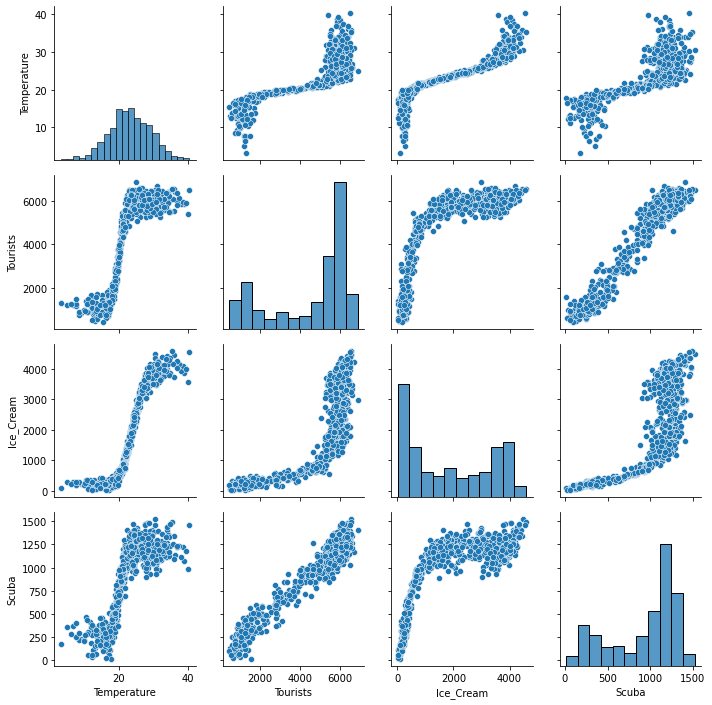

In [29]:

g = sns.PairGrid(dataset)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Let us make a prediction model for Ice Cream sales then. For the sake of comparability later on, we will create the dataset for you

In [30]:
x_variables=['Temperature', 'Scuba', 'Tourists']
y_variables=['Ice_Cream']

In [31]:
x_train, x_test, y_train, y_test=train_test_split(dataset[x_variables], dataset[y_variables], shuffle=False)

Now, can you find a prediction model you like? For this case, it is fine that you use only train+test set (so, you can just try several models, and see which ones are best in the test set)

In [32]:
mlp=MLPRegressor()
gp=GaussianProcessRegressor()
gb=GradientBoostingRegressor()
rf=RandomForestRegressor()
lr=LinearRegression()

In [33]:
def evaluate_models(models, x_test, y_test, x_train=[], y_train=[]):
    if isinstance(x_train, pd.DataFrame):  
        fit=True   #just for clarity
    else: 
        fit=False
        
    for model, name in models:
        if fit:
            model.fit(x_train, y_train)
            preds_train=model.predict(x_train)
        preds_test=model.predict(x_test)
        print(name+":")
        if fit:
            print("R^2: training performance: %.1f testset performance: %.4f"%(r2_score(y_train, preds_train),r2_score(y_test, preds_test)))
            print("MAE: training performance: %.1f testset performance: %.4f"%(mean_absolute_error(y_train, preds_train),mean_absolute_error(y_test, preds_test)))
        else:
            print("R^2: testset performance: %.4f"%(r2_score(y_test, preds_test)))
            print("MAE: testset performance: %.4f"%(mean_absolute_error(y_test, preds_test)))
        print("-"*20+"\n")

In [34]:
evaluate_models([(mlp, "MultiLayer Perceptron"), (gp, "Gaussian Processes"), (gb, "Gradient Boosting"), (rf, "Random Forest"), (lr, "Linear Regression")], x_test, y_test, x_train, y_train)

MultiLayer Perceptron:
R^2: training performance: 0.6 testset performance: 0.6246
MAE: training performance: 826.6 testset performance: 781.3942
--------------------

Gaussian Processes:
R^2: training performance: 1.0 testset performance: -1.6281
MAE: training performance: 0.0 testset performance: 1860.9060
--------------------

Gradient Boosting:
R^2: training performance: 1.0 testset performance: 0.9989
MAE: training performance: 16.7 testset performance: 35.3274
--------------------

Random Forest:
R^2: training performance: 1.0 testset performance: 0.9987
MAE: training performance: 15.2 testset performance: 38.1025
--------------------

Linear Regression:
R^2: training performance: 0.9 testset performance: 0.8641
MAE: training performance: 473.9 testset performance: 447.6331
--------------------



----------

### Low season campaign

#### To let you predict the Ice Cream sales, you are given a dataset with predicted temperatures for each day (follows the usual distribution of the island), together with the tourist and scuba diving reservations.

Of course, this file also has the "ground truth" Ice Cream sales, but that you can only use to compare with your predictions... ;-)

The file is called "lowseason_campaign.csv"

In [35]:
lowseasondataset=pd.read_csv("lowseason_campaign.csv")

In [36]:
lowseasondataset.head()

,Temperature,Tourists,Ice_Cream,Scuba
0,16.639106,5131.221428,303.917223,1098.140947
1,17.043430,5469.023159,243.187159,1080.571790
2,18.371333,6901.225723,365.027205,1341.580287
3,18.057413,6243.237229,463.347273,1364.203903
4,16.664961,5975.660824,330.281613,1278.683295


Just to compare, visualize again the relationships between the variables (i.e. when temperature<20) for this upcoming low season and for the previous ones.

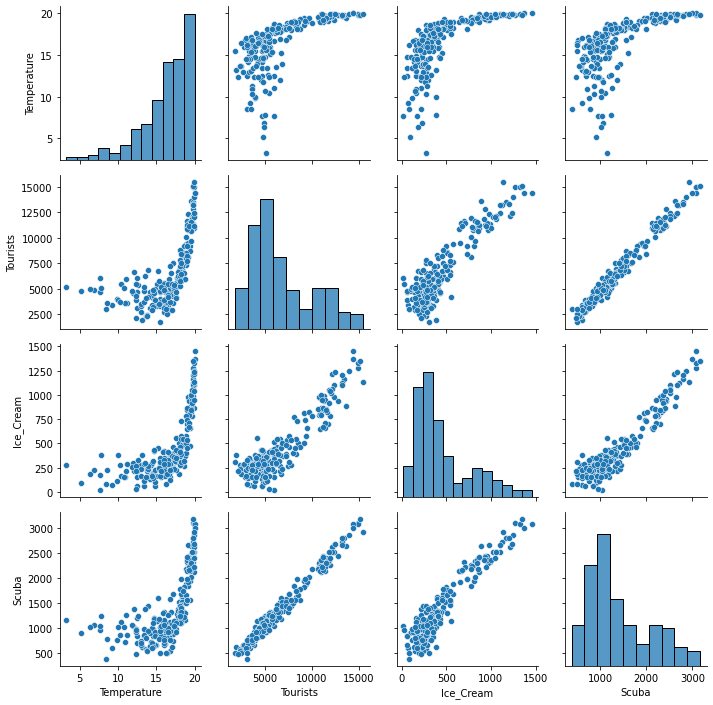

In [37]:
g = sns.PairGrid(lowseasondataset)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

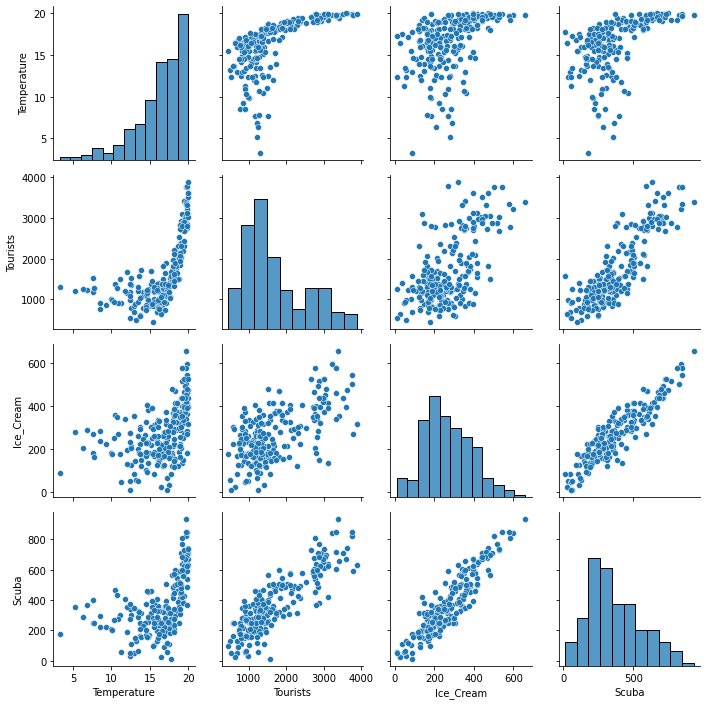

In [38]:

g = sns.PairGrid(dataset[dataset.Temperature<20])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Notice that the scales are different, because the island got many more tourists this time. 

Can you now run your prediction model on this dataset, and compare the results with the ground truth?

In [39]:
x_test_new=lowseasondataset[x_variables]
y_test_new=lowseasondataset[y_variables]

In [40]:
evaluate_models([(mlp, "MultiLayer Perceptron"), (gp, "Gaussian Processes"), (gb, "Gradient Boosting"), (rf, "Random Forest"), (lr, "Linear Regression")], x_test_new, y_test_new)

MultiLayer Perceptron:
R^2: testset performance: -78.8374
MAE: testset performance: 2604.0213
--------------------

Gaussian Processes:
R^2: testset performance: -2.0270
MAE: testset performance: 457.7945
--------------------

Gradient Boosting:
R^2: testset performance: -1.1278
MAE: testset performance: 420.5306
--------------------

Random Forest:
R^2: testset performance: -0.4650
MAE: testset performance: 347.8432
--------------------

Linear Regression:
R^2: testset performance: -4.3328
MAE: testset performance: 633.4912
--------------------



What do you conclude? Did you do a good job predicting? If not, what may be missing?...

------- 